## Imports

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

## Data provisioning

In [12]:
file_path = "Shanghai Containerized Freight Index.xlsx"
df = pd.read_excel(file_path, header=1)

df.columns = df.columns.str.strip().str.lower()

rename_map = {
    "the period (yyyy-mm-dd)": "date",
    "comprehensive index": "comprehensive_index",
    "europe (base port)": "europe_base_port",
    "mediterranean (base port)": "mediterranean_base_port",
    "persian gulf and red sea (dubai)": "persian_gulf_red_sea_dubai"
}
df.rename(columns=rename_map, inplace=True)

print("Columns after cleaning:", df.columns.tolist())

Columns after cleaning: ['date', 'comprehensive_index', 'europe_base_port', 'mediterranean_base_port', 'persian_gulf_red_sea_dubai']


## Fix and sort

In [13]:

for col in ["comprehensive_index", "europe_base_port",
            "mediterranean_base_port", "persian_gulf_red_sea_dubai"]:
    df[col] = (df[col]
               .astype(str)
               .str.replace(",", ".", regex=False)
               .astype(float))

## parse and sort
df['date'] = pd.to_datetime(df['date'], dayfirst=True, errors='coerce')
df = df.dropna(subset=['date']).sort_values('date').reset_index(drop=True)
df.head()

,date,comprehensive_index,europe_base_port,mediterranean_base_port,persian_gulf_red_sea_dubai
0,2018-01-05,816.58,888.0,738.0,433.0
1,2018-01-12,839.72,897.0,759.0,450.0
2,2018-01-19,840.36,891.0,761.0,572.0
3,2018-01-26,858.60,907.0,772.0,631.0
4,2018-02-02,883.59,912.0,797.0,611.0


## Visualize the data

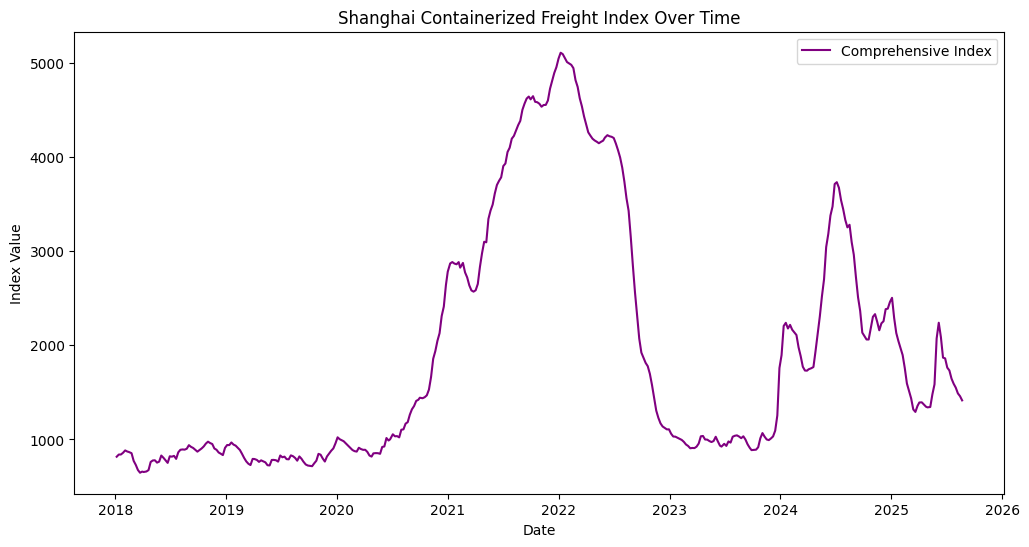

In [14]:
plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['comprehensive_index'], label='Comprehensive Index', color='purple')
plt.title("Shanghai Containerized Freight Index Over Time")
plt.xlabel("Date")
plt.ylabel("Index Value")
plt.legend()
plt.show()

## Data 2018 - 2020

I have decided to evaluate the data from 2018 to mid 2020 to see seasonality because I then manage to avoid the covid spike which caused a huge increase in price that would be considered a black swan and not normal seasonality. the evaluation I am doing here is to avoid that and get a clear understanding of what normal seasonality trends look like

### Filter pre Covid

In [15]:

df_pre_covid = df[(df['date'] >= '2018-01-01') & (df['date'] <= '2020-06-30')].copy()
df_pre_covid.set_index('date', inplace=True)

print(f"Pre-COVID data range: {df_pre_covid.index.min().date()} to {df_pre_covid.index.max().date()}")
print(f"Number of records: {len(df_pre_covid)}")

Pre-COVID data range: 2018-01-05 to 2020-06-24
Number of records: 124


### Time series

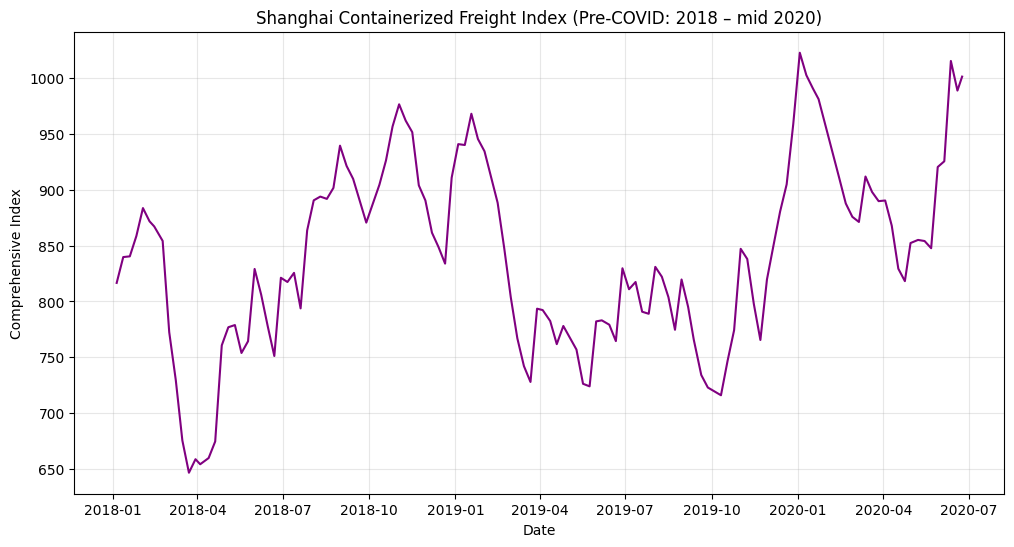

In [16]:

plt.figure(figsize=(12,6))
plt.plot(df_pre_covid.index, df_pre_covid['comprehensive_index'], color='purple')
plt.title("Shanghai Containerized Freight Index (Pre-COVID: 2018 – mid 2020)")
plt.xlabel("Date")
plt.ylabel("Comprehensive Index")
plt.grid(True, alpha=0.3)
plt.show()

### Monthly average

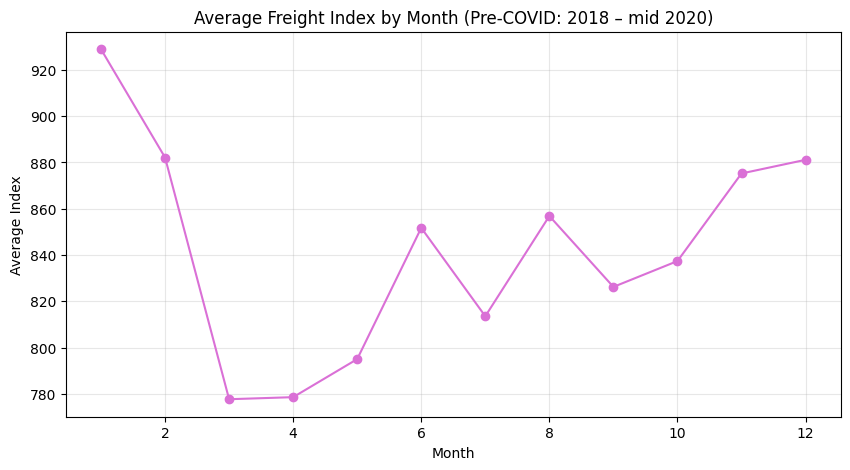

In [17]:
df_pre_covid['month'] = df_pre_covid.index.month
monthly_avg_pre = df_pre_covid.groupby('month')['comprehensive_index'].mean()

plt.figure(figsize=(10,5))
plt.plot(monthly_avg_pre.index, monthly_avg_pre.values, marker='o', color='orchid')
plt.title("Average Freight Index by Month (Pre-COVID: 2018 – mid 2020)")
plt.xlabel("Month")
plt.ylabel("Average Index")
plt.grid(True, alpha=0.3)
plt.show()

### Seasonal decomp

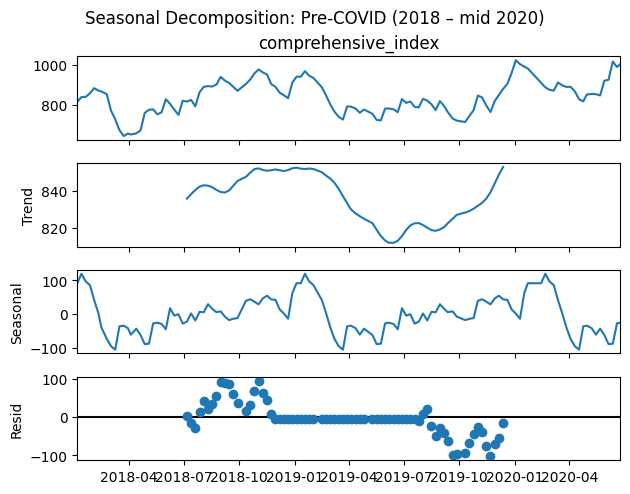

In [18]:
decomp = seasonal_decompose(df_pre_covid['comprehensive_index'], model='additive', period=52)
decomp.plot()
plt.suptitle("Seasonal Decomposition: Pre-COVID (2018 – mid 2020)", y=1.02)
plt.show()

## Conclusion

As is clear from the graphs above the seasonality between these years follows a similar trend. It seems we have a big spike around the start of the year which may be related to christmas backlog or new year. Then after this we see a substantial drop around Feb / March which is probably the aftermath of christmas and new year, which is an expensive time for people. Then there is another smaller spike around june which could be people buying things for summer (clothing, travel items etc.) Then another small spike in august which is around back to school time. Then in months 10, 11 and 12 we see the prices start to rise more seriously in relation once again to christmas.

All in all these trends seem similar to each other over the years so it is a good indicator that the seasonality will not be too complicated to predict. My only concern is the lack of data we have of other years and if post covid seasonality looks very different to pre covid. 